In [1]:
import datetime
import xarray
import matplotlib
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


In [2]:
import xarray as xr
import datetime 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import metpy
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.units import units

In [3]:
from osgeo import gdal
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt


In [4]:
import cartopy.crs as ccrs

ds = xr.open_dataset('/g/data/cj37/BARRA/BARRA_SY/v1/static/topog-fc-slv-PT0H-BARRA_SY-v1.nc')
elevation = ds['topog'].sel(latitude=slice(-38,-28), longitude = slice(147, 153.5))
#elevation = elevation.sel(latitude=slice(-37,-28), longitude = slice(142, 154))

0.3.0


In [5]:
ds_new = ds.where(ds>0, drop = True)
elevation_new = ds_new['topog'].sel(latitude=slice(-38,-28), longitude = slice(147, 153.5))


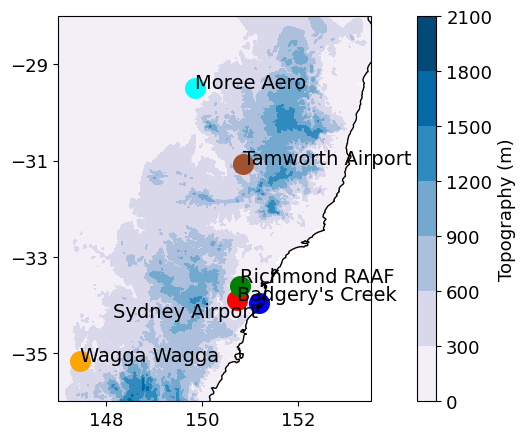

In [14]:


projection = ccrs.PlateCarree()

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 5),
                       subplot_kw={'projection': ccrs.PlateCarree()})


# Plot the contour of elevation
cs = ax.contourf(elevation_new.longitude, elevation_new.latitude, elevation_new, transform=projection, cmap = 'PuBu' )

# Set the extent of the map
ax.set_extent([147, 153.5, -36, -28])


# Add a coastlines layer
ax.coastlines()
ax.set_xticks([148,150,152])
ax.set_yticks([-35, -33, -31, -29])

# ax.set_xlabel('longitude (deg)', fontsize=18)
# ax.set_ylabel('latitude (deg)', fontsize=18)

ax.scatter(150.73, -33.90, marker='o',s=200,color='red', transform=ccrs.PlateCarree())
ax.annotate("Badgery's Creek", fontsize = 14, xy=(150.73, -33.90), xytext=(150.73, -33.90),transform=ccrs.PlateCarree())

ax.scatter(150.78, -33.60, marker='o',s=200,color='green', transform=ccrs.PlateCarree())
ax.annotate("Richmond RAAF", fontsize = 14, xy=(150.78, -33.60), xytext=(150.78, -33.60),ha='left', va='bottom',transform=ccrs.PlateCarree())

ax.scatter(151.17, -33.95, marker='o',s=200,color='blue', transform=ccrs.PlateCarree())
ax.annotate("Sydney Airport", fontsize = 14, xy=(151.20, -33.98), xytext=(151.17, -33.95),ha='right', va='top',transform=ccrs.PlateCarree())

ax.scatter(150.84, -31.07, marker='o',s=200,color='sienna', transform=ccrs.PlateCarree())
ax.annotate("Tamworth Airport", fontsize = 14, xy=(150.84, -31.07), xytext=(150.84, -31.07),transform=ccrs.PlateCarree())

ax.scatter(147.46, -35.16, marker='o',s=200,color='orange', transform=ccrs.PlateCarree())
ax.annotate("Wagga Wagga", fontsize = 14, xy=(147.46, -35.16), xytext=(147.46, -35.16),transform=ccrs.PlateCarree())

ax.scatter(149.85, -29.49, marker='o',s=200,color='cyan', transform=ccrs.PlateCarree())
ax.annotate("Moree Aero", fontsize = 14,xy=(149.85, -29.49), xytext=(149.85, -29.49),transform=ccrs.PlateCarree())





#ax.legend(loc='upper left')

cbar = plt.colorbar(cs, shrink = 1.0, orientation='vertical', 
                    #label='Topography (m)'
                   )
cbar.ax.tick_params(labelsize = 13)
cbar.set_label("Topography (m)", fontsize = 13)

ax.tick_params(axis='y', labelsize=13)
ax.tick_params(axis='x', labelsize=13)
#cbar.ax.set_title("Topography (m)", fontsize = 14, loc='center')
plt.show()

In [7]:
#elevation_new.sel(latitude =-31.07 , longitude = 150.84, method = 'nearest') #Tamworth
#elevation_new.sel(latitude =-33.90 , longitude = 150.73, method = 'nearest') #Badgerys
#elevation_new.sel(latitude =-29.49 , longitude = 149.85, method = 'nearest') #moree
#elevation_new.sel(latitude =-35.16 , longitude = 147.46, method = 'nearest') #wagga
#elevation_new.sel(latitude =-33.60 , longitude = 150.78, method = 'nearest') #richmond
elevation_new.sel(latitude =-33.95 , longitude = 151.17, method = 'nearest') #sydney

<xarray.DataArray 'topog' ()>
array(5.48926544)
Coordinates:
    latitude                 float32 -33.94
    longitude                float32 151.2
    forecast_period          timedelta64[ns] 03:00:00
    forecast_reference_time  datetime64[ns] 2010-09-18T18:00:00
    time                     datetime64[ns] 2010-09-18T21:00:00
Attributes:
    standard_name:           surface_altitude
    units:                   m
    um_stash_source:         m01s00i033
    grid_mapping:            latitude_longitude
    long_name:               OROGRAPHY (/STRAT LOWER BC)
    stash_code:              33
    wgdos_packing_accuracy:  None
    description:             Height of topography (above the geoid).
    MD5:                     7a8f244af47c98e189a6fb18760e3c52

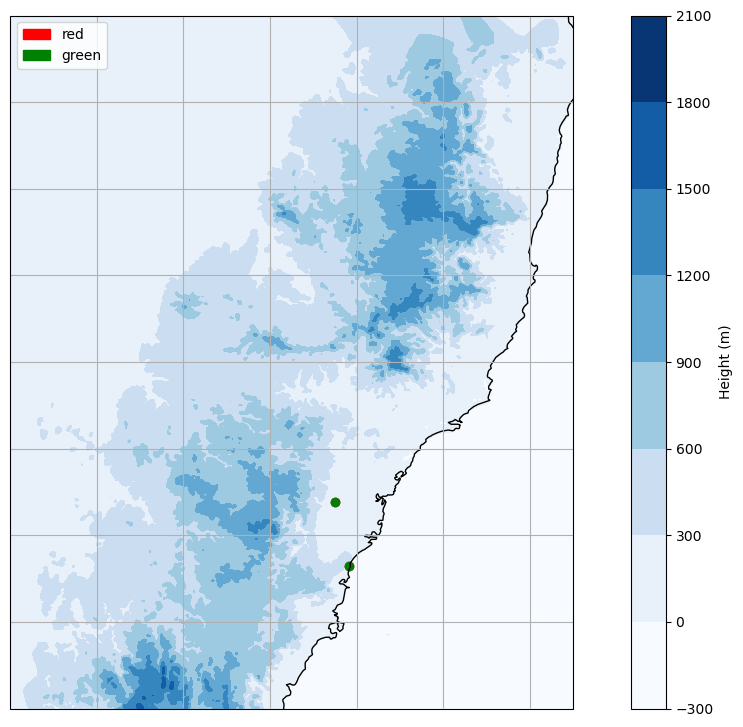

In [8]:
import matplotlib.patches as mpatches

# Create the figure and axes
fig, ax = plt.subplots(figsize=(15, 9),
                       subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the contour of elevation
cs = ax.contourf(elevation.longitude, elevation.latitude, elevation, transform=projection, vmin=0, vmax= 2000, cmap = 'Blues' )

# Set the extent of the map
ax.set_extent([147, 153.5, -36, -28])

# Add a coastlines layer
ax.coastlines()
ax.gridlines()

x = [150.91, 150.75]
y = [-34.36, -33.62]
colors = ['red', 'green']

for color in colors:
    ax.scatter(x, y, c=color)
    red_patch = mpatches.Patch(color='red', label='red')
    green_patch = mpatches.Patch(color='green', label='green')
    
    
    
ax.legend(handles=[red_patch, green_patch], loc="upper left")

plt.colorbar(cs, shrink = 1.0, orientation='vertical', label='Height (m)')

plt.show()

In [9]:
#ds = xarray.open_dataset('max_wndgust10m-fc-spec-PT1H-BARRA_SY-v1-20160114T0000Z.sub.nc')

In [10]:
#ds

In [11]:
ncdf = Dataset('/g/data/cj37/BARRA/BARRA_SY/v1/static/topog-fc-slv-PT0H-BARRA_SY-v1.nc', mode='r')
lons = ncdf.variables['longitude'][:]
lats = ncdf.variables['latitude'][:]
time = ncdf.variables['time'][:]

# weather_elements = ncdf.variables['topog'][:] 
# # time_values = ncdf.variables['time'][:]
# # pressure=ncdf.variables['pressure'][:]

# #z_value = 14

# # count_time = weather_elements.shape[0]
# # count_lat = weather_elements.shape[1]
# # count_lng = weather_elements.shape[2]
# # count_pressure = weather_elements.shape[3]

# # t=4
ncdf.close()


In [12]:
#m = Basemap(projection='cyl', resolution='h',
 #             llcrnrlat=-36.0, urcrnrlat=-33.0,
  #            llcrnrlon=149.0, urcrnrlon=152.50)

In [13]:
m = Basemap(projection='cyl', resolution='h',
              llcrnrlat=-37.66, urcrnrlat=-28.02,
              llcrnrlon=142.0, urcrnrlon=153.7)

NameError: name 'Basemap' is not defined

In [ ]:
plt.figure(figsize=(14,9))
lon, lat = np.meshgrid(lons, lats)
x1, y1 = m(lon, lat)
#cs = m.contourf(x1,y1,weather_elements[t,z_value,:,:],range(-10,9))
#cb = m.colorbar(cs,"right", size="7%", pad="10%")
#cb.ax.set_ylabel('vertical wind speed(ms-1)', fontsize = 20)
  
#cb.ax.tick_params(labelsize=20) 


#font = matplotlib.font_manager.FontProperties(family='times new roman', style='italic', size=16)
parallels = np.arange(-40.0,-27.0,1.0) # make latitude lines ever 5 degrees from 30N-50N
meridians = np.arange(146,156,1.0) # make longitude lines every 5 degrees from 95W to 70W
m.drawcoastlines(color='black')
m.drawstates()

#m.drawparallels(parallels,labels=[1,0,0,0],fontsize=25)
#m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=25)



#plt.title('', fontsize = 30 )

x, y = m(150.91, -34.36)
plt.plot(x, y, 'o', markersize=11, color='red')
plt.text(x, y, 'Bellambi port', fontsize=15,color='black', ha='left', va='top')
plt.legend(loc ="lower left", frameon=False, fontsize=10)

x, y = m(150.75, -33.62)
plt.plot(x, y, 'v', markersize=11, color='green')
plt.text(x, y, 'Richmond RAAF', fontsize=15,color='black',ha='right', va='top')

x, y = m(151.20, -33.98)
plt.plot(x, y, 's', markersize=11, color='blue')
plt.text(x, y, 'Sydney Airport', fontsize=15,color='black', ha='right', va='top')

x, y = m(150.84, -31.08)
plt.plot(x, y, 'p', markersize=11, color='sienna')
plt.text(x, y, 'Tamworth Airport', fontsize=15,color='black')

x, y = m(147.46, -35.15)
plt.plot(x, y, 'D', markersize=11, color='orange')
plt.text(x, y, 'Wagga Wagga Airport', fontsize=15,color='black')


x, y = m(149.84, -29.49)
plt.plot(x, y, 'P', markersize=11, color='cyan')
plt.text(x, y, 'Moree Airport', fontsize=15,color='black')


font = {'family': 'serif',
        'color':  'black',
        'size': 12
        }

box = {'facecolor': 'white',
       'edgecolor': 'black',
       'boxstyle': 'round'
      }
#plt.text(141.1, -28.2,'A piece of text',fontdict=font )
plt.tight_layout(pad=3.0)

# x, y = m(151.58, -33.28)
# plt.plot(x, y, 'ow', markersize=8, color='red')
# plt.text(x, y, 'Norah Head AWS', fontsize=10,color='black')

# x, y = m(141.47, -31.9)
# plt.plot(x, y, 'ow', markersize=8, color='red')
# plt.text(x, y, 'Broken Hill Airport', fontsize=10,color='black')

# x, y = m(151.82, -32.79)
# plt.plot(x, y, 'ow', markersize=8, color='red')
# plt.text(x, y, 'Williamtown RAAF', fontsize=10,color='black',ha='right', va='top')

# x, y = m(145.94, -30.04)
# plt.plot(x, y, 'ow', markersize=8, color='red')
# plt.text(x, y, 'Bourke Airport', fontsize=10,color='black')

# x, y = m(150.73, -33.9)
# plt.plot(x, y, 'ow', markersize=8, color='red')
# plt.text(x, y, 'Badgerys creekAWS', fontsize=10,color='black')

# x, y = m(146.95, -36.06)
# plt.plot(x, y, 'ow', markersize=8, color='red')
# plt.text(x, y, 'Albury Airport', fontsize=10,color='black',ha='right', va='top')



#plt.text(x, y-0.25, ' V=%.3f'%weather_elements[t,301,312], fontsize=15,color='white');


In [ ]:
weather_elements[3,19,:,:]

In [ ]:
weather_elements[:]

In [ ]:
print(weather_elements[3,19,:,:])